In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_opts = {'sep': '|',
           'quotechar': '"',
           'compression': 'gzip',
           'encoding': 'utf-8'}

In [3]:
with open('../hand/arrest_dtypes.yaml', 'r') as yamlfile:
        arrest_dtypes = yaml.load(yamlfile)

In [4]:
arrests = pd.read_csv('../input/arrests.csv.gz', **csv_opts, dtype=arrest_dtypes)

In [5]:
arrests['apprehension_date'] = pd.to_datetime(arrests['apprehension_date'], format='%m/%d/%Y')

In [6]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544059 entries, 0 to 544058
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   aor                     540251 non-null  category      
 1   apprehension_date       544059 non-null  datetime64[ns]
 2   apprehension_method     544059 non-null  category      
 3   apprehension_landmark   529216 non-null  category      
 4   operation               117368 non-null  category      
 5   processing_disposition  543865 non-null  category      
 6   citizenship             544059 non-null  category      
 7   gender                  544059 non-null  category      
 8   id                      544059 non-null  int64         
dtypes: category(7), datetime64[ns](1), int64(1)
memory usage: 13.4 MB


In [7]:
arrests.head()

,aor,apprehension_date,apprehension_method,apprehension_landmark,operation,processing_disposition,citizenship,gender,id
0,SPM,2015-10-01,Probation and Parole,OMAHA NE NON-FUGITIVE ARREST,NaN,REINSTATEMENT OF DEPORT ORDER I-871,MEXICO,Male,0
1,CHI,2015-10-01,Non-Custodial Arrest,"CHI GENERAL AREA, NON-SPECIFIC",NaN,Bag and Baggage,GUATEMALA,Male,1
2,LOS,2015-10-01,CAP State Incarceration,CALIFORNIA MENS COLONY WEST,NaN,Other,LAOS,Male,2
3,HOU,2015-10-01,CAP State Incarceration,"TEXAS DEPT OF CRIMINAL JUSTICE, WALKER CO",NaN,REINSTATEMENT OF DEPORT ORDER I-871,MEXICO,Male,3
4,SNA,2015-10-01,CAP Federal Incarceration,HOUSTON ERO CONTRACT DET FACILITY,NaN,Other,MEXICO,Male,4


In [8]:
list(arrests['apprehension_method'].unique())

['Probation and Parole',
 'Non-Custodial Arrest',
 'CAP State Incarceration',
 'CAP Federal Incarceration',
 'CAP Local Incarceration',
 'Located',
 '287(g) Program',
 'Other Agency (turned over to INS)',
 'ERO Reprocessed Arrest',
 'Other efforts',
 'Other Task Force',
 'Anti-Smuggling',
 'Law Enforcement Agency Response Unit',
 'Patrol Border',
 'Inspections',
 'Crewman/Stowaway',
 'Patrol Interior',
 'Criminal Alien Program',
 'Worksite Enforcement',
 'Organized Crime Drug Enforcement Task Force',
 'Boat Patrol',
 'Traffic Check',
 'Transportation Check Bus',
 'Transportation Check Aircraft',
 'Transportation Check Freight Train',
 'Transportation Check Passenger Train']

In [9]:
simplified_methods = {'Other efforts': 'Other',
'Law Enforcement Agency Response Unit': 'Other',
'Patrol Border': 'Other',
'Other Agency (turned over to INS)': 'Other',
'Inspections': 'Other',
'Other Task Force': 'Other',
'Worksite Enforcement': 'Other',
'Organized Crime Drug Enforcement Task Force': 'Other',
'Anti-Smuggling': 'Other',
'Patrol Interior': 'Other',
'Traffic Check': 'Other',
'Boat Patrol': 'Other',
'Crewman/Stowaway': 'Other',
'Transportation Check Aircraft': 'Other',
'Criminal Alien Program': 'Other',
'Transportation Check Freight Train': 'Other',
'Transportation Check Bus': 'Other',
'Transportation Check Passenger Train': 'Other'}

even_simpler_methods = {'Non-Custodial Arrest': 'At Large',
 'CAP State Incarceration': 'CAP All',
 'CAP Federal Incarceration': 'CAP All',
 'CAP Local Incarceration': 'CAP All',
 'Located':'At Large'}

In [10]:
arrests['method'] = arrests['apprehension_method'].str.strip().replace(simplified_methods)
arrests['method'] = arrests['method'].str.strip().replace(even_simpler_methods)

In [11]:
g = arrests.set_index('apprehension_date').groupby(['aor', 'method'])

In [12]:
data = g['id'].count().unstack()

In [13]:
# data['Total Arrests'] = data.sum(axis=1)

In [14]:
data_norm = data.div(data.sum(axis=1), axis=0) * 100

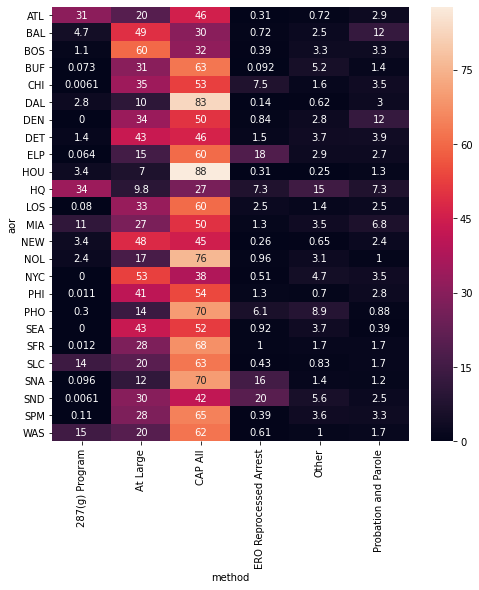

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(data_norm.fillna(0), ax=ax, square=False, annot=True)

In [16]:
arrests['processing_disposition'].str.upper().value_counts(dropna=False)

WARRANT OF ARREST/NOTICE TO APPEAR              225787
REINSTATEMENT OF DEPORT ORDER I-871             111084
OTHER                                            99196
BAG AND BAGGAGE                                  44505
ADMINISTRATIVE DEPORTATION I-851/I-851A          17664
VOLUNTARY RETURN                                  9703
EXPEDITED REMOVAL (I-860)                         8940
DETAINER                                          6256
NOTICE TO APPEAR RELEASED (I-862)                 3776
REINSTATEMENT OF DEPORTATION REASONABLE FEAR      3112
PROSECUTORIAL DISCRETION                          3023
EXPEDITED REMOVAL WITH CREDIBLE FEAR              1631
TURNED OVER TO                                    1480
NOTICE TO APPEAR DETAINED (I-862)                 1479
VWPP REMOVAL                                      1418
NOT AMENABLE TO REMOVAL                           1142
NOTICE TO APPEAR (I-862)                           960
PAROLED                                            881
VWP REMOVA

In [17]:
sea = arrests[arrests['aor'] == 'SEA']

In [18]:
sea['processing_disposition'].value_counts()

Warrant of Arrest/Notice to Appear              5549
REINSTATEMENT OF DEPORT ORDER I-871             2497
Other                                           1719
Bag and Baggage                                  861
ADMINISTRATIVE DEPORTATION I-851/I-851A          389
Reinstatement of Deportation Reasonable Fear     120
TURNED OVER TO                                    63
Detainer                                          53
Prosecutorial Discretion                          49
Expedited Removal (I-860)                         33
Not in Custody                                    27
Notice to Appear Released (I-862)                 23
VWPP Removal                                      19
Voluntary Return                                  18
Notice to Appear (I-862)                          15
Notice to Appear Detained (I-862)                 11
VWP Removal                                        9
Not Amenable to Removal                            5
Paroled                                       

In [19]:
arrest_by_fy = arrests.set_index('apprehension_date').groupby([pd.Grouper(freq='AS-OCT'), 'aor'])['id'].count().unstack().T

In [20]:
# AOR % increase FY16-18
aor_change = (arrest_by_fy['2017-10-01'] - arrest_by_fy['2015-10-01']) / arrest_by_fy['2015-10-01'] * 100
aor_change

aor
ATL     71.317392
BAL     37.449556
BOS     56.512379
BUF     34.867860
CHI     30.985117
DAL     83.143035
DEN     20.621716
DET     60.821062
ELP     34.016139
HOU     11.142990
HQ     -58.333333
LOS      2.653248
MIA    140.465380
NEW     51.713396
NOL     98.492462
NYC     88.197076
PHI     40.059913
PHO     33.370577
SEA     13.676798
SFR     -6.630582
SLC     24.062096
SNA     27.584570
SND     62.910671
SPM     86.320000
WAS     51.196670
dtype: float64

In [21]:
# Total % increase FY16-FY18
total_change = (arrest_by_fy['2017-10-01'].sum() - arrest_by_fy['2015-10-01'].sum()) / arrest_by_fy['2015-10-01'].sum() * 100
total_change

43.590210503314154

In [24]:
# arr_below_total = aor_change < total_increase

In [25]:
arrest_by_fy

apprehension_date,2015-10-01,2016-10-01,2017-10-01,2018-10-01
aor,,,,
ATL,8866,13551,15189,12268
BAL,1239,1666,1703,1330
BOS,1858,2834,2908,2266
BUF,1173,1494,1582,1206
CHI,7055,8604,9241,7769
DAL,9634,16520,17644,15571
DEN,2284,2746,2755,2215
DET,2241,3409,3604,3094
ELP,1611,1892,2159,2103


In [26]:
facil_adp = pd.read_csv('../input/facility_adp_by_fy.csv', index_col=0)

facil_adp.tail()

t = ['2008-10-01',
'2009-10-01',
'2010-10-01',
'2011-10-01',
'2012-10-01',
'2013-10-01',
'2014-10-01',
'2015-10-01',
'2016-10-01',
'2017-10-01']

facil_adp.index = t
facil_adp.index = pd.to_datetime(facil_adp.index)

# Percent change in ADP FY16-FY18
aor_facil_change = (facil_adp.T['2017-10-01'] - facil_adp.T['2015-10-01']) / facil_adp.T['2015-10-01'] * 100
aor_facil_change

# Total ADP % change FY16-FY18
total_facil_change = (facil_adp.T['2017-10-01'].sum() - facil_adp.T['2015-10-01'].sum()) / facil_adp.T['2015-10-01'].sum() * 100
total_facil_change

facil_below_total = aor_facil_change < total_facil_change

In [27]:
arrests_facil = pd.concat([aor_change, aor_facil_change], axis=1)

In [28]:
arrests_facil.columns = ['Arrest % change FY16-18', 'Detention ADP % change FY16-18']

In [29]:
totals = [total_change, total_facil_change]

In [30]:
arrests_facil.loc['Total',:] = totals

In [31]:
arrests_facil

,Arrest % change FY16-18,Detention ADP % change FY16-18
ATL,71.317392,65.924171
BAL,37.449556,23.484848
BOS,56.512379,38.378378
BUF,34.867860,4.111842
CHI,30.985117,13.161560
DAL,83.143035,25.190011
DEN,20.621716,31.643002
DET,60.821062,110.964083
ELP,34.016139,3.726205
HOU,11.142990,-18.201285


In [32]:
arrests_facil <= arrests_facil.loc['Total',:]

,Arrest % change FY16-18,Detention ADP % change FY16-18
ATL,False,False
BAL,True,False
BOS,False,False
BUF,True,True
CHI,True,False
DAL,False,False
DEN,True,False
DET,False,False
ELP,True,True
HOU,True,True


In [105]:
aor_top_5 = pd.DataFrame()

In [106]:
g = arrests.groupby(['aor'])

In [107]:
for aor in arrests['aor'].unique().dropna():
    top = g['apprehension_landmark'].value_counts()[aor].head()
    top = top.reset_index(drop=False, name='count')
    top['aor'] = aor
    aor_top_5 = pd.concat([aor_top_5, top])

In [110]:
aor_top_5 = aor_top_5.set_index('aor')

In [111]:
aor_top_5.to_csv('../output/top_5_app_landmarks.csv')